In [17]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy import stats
from scipy.io import loadmat
from sklearn.cluster.bicluster import SpectralBiclustering, SpectralCoclustering

import cPickle

In [2]:
band1 = np.load('band1.dump')
band2 = np.load('band2.dump')
band3 = np.load('band3.dump')
band4 = np.load('band4.dump')
band5 = np.load('band5.dump')

In [3]:
band = np.transpose(np.concatenate((band1, band2, band3, band4, band5)))
band.shape

(63L, 3383767L)

In [5]:
length_of_intervals = 30000
channels_data = [[[0 for i in range(63)] for i in range(63)] for i in range(len(band[0])/length_of_intervals + 1)]

def calculate_pearson(start):
    for interval in range(len(band[start]) / length_of_intervals + 1):
        j = length_of_intervals * interval
        # print j, interval
        if interval == len(band[start]) / length_of_intervals + 1:
            for index in range(63):
                channels_data[interval][start][index] = pearsonr(band[start][j:], 
                                                                 band[index][j:])[0]
        else:
            for index in range(63):
                channels_data[interval][start][index] = pearsonr(band[start][j:j + length_of_intervals],
                                                                 band[index][j:j + length_of_intervals])[0]

if __name__ == '__main__':
    for i in range(63):
        print 'Calculating Channel %s' % i
        calculate_pearson(i)

Calculating Channel 0
Calculating Channel 1
Calculating Channel 2
Calculating Channel 3
Calculating Channel 4
Calculating Channel 5
Calculating Channel 6
Calculating Channel 7
Calculating Channel 8
Calculating Channel 9
Calculating Channel 10
Calculating Channel 11
Calculating Channel 12
Calculating Channel 13
Calculating Channel 14
Calculating Channel 15
Calculating Channel 16
Calculating Channel 17
Calculating Channel 18
Calculating Channel 19
Calculating Channel 20
Calculating Channel 21
Calculating Channel 22
Calculating Channel 23
Calculating Channel 24
Calculating Channel 25
Calculating Channel 26
Calculating Channel 27
Calculating Channel 28
Calculating Channel 29
Calculating Channel 30
Calculating Channel 31
Calculating Channel 32
Calculating Channel 33
Calculating Channel 34
Calculating Channel 35
Calculating Channel 36
Calculating Channel 37
Calculating Channel 38
Calculating Channel 39
Calculating Channel 40
Calculating Channel 41
Calculating Channel 42
Calculating Channel 4

In [10]:
channels = range(63)
interval = len(channels_data)
index = 63*62/2 + 63
pearson_band_data = [[None for j in range(index)] for i in range(interval)]

def pearson_(interval):
    index_counter = 0
    for start in channels:
        for channel in channels:
            if start <= channel:
                pearson_band_data[interval][index_counter] = channels_data[interval][start][channel]
                index_counter += 1
    print index_counter
            
            
# for i in range(2):
for i in range(interval):
    print 'Interval %i ' % i,
    pearson_(i)

 Interval 0  2016
Interval 1  2016
Interval 2  2016
Interval 3  2016
Interval 4  2016
Interval 5  2016
Interval 6  2016
Interval 7  2016
Interval 8  2016
Interval 9  2016
Interval 10  2016
Interval 11  2016
Interval 12  2016
Interval 13  2016
Interval 14  2016
Interval 15  2016
Interval 16  2016
Interval 17  2016
Interval 18  2016
Interval 19  2016
Interval 20  2016
Interval 21  2016
Interval 22  2016
Interval 23  2016
Interval 24  2016
Interval 25  2016
Interval 26  2016
Interval 27  2016
Interval 28  2016
Interval 29  2016
Interval 30  2016
Interval 31  2016
Interval 32  2016
Interval 33  2016
Interval 34  2016
Interval 35  2016
Interval 36  2016
Interval 37  2016
Interval 38  2016
Interval 39  2016
Interval 40  2016
Interval 41  2016
Interval 42  2016
Interval 43  2016
Interval 44  2016
Interval 45  2016
Interval 46  2016
Interval 47  2016
Interval 48  2016
Interval 49  2016
Interval 50  2016
Interval 51  2016
Interval 52  2016
Interval 53  2016
Interval 54  2016
Interval 55  2016
I

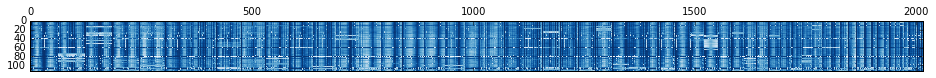

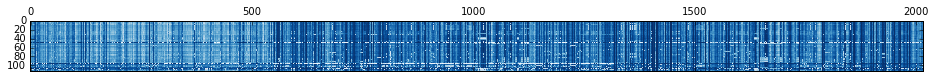

In [63]:
pearson_data = np.array(pearson_band_data)
spectral_model = SpectralBiclustering()
spectral_model.fit(pearson_data)
fit_data = pearson_data[np.argsort(spectral_model.row_labels_)]
fit_data = fit_data[:, np.argsort(spectral_model.column_labels_)]
plt.matshow(pearson_data, cmap=plt.cm.Blues)
plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.show()


In [64]:
import json as simplejson
with open('media/pearson_30s_band_2016.json', 'w+') as f:
    p = [[float(column) for column in row] for row in pearson_data]
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': p}))

with open('media/pearson_30s_band_trans_2016.json', 'w+') as f:
    p = [[float(column) for column in row] for row in np.transpose(pearson_data)]
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': p}))